In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
# load dataset
df = read_csv('dataset.csv')

In [3]:
df.head()

,position,intention,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
# split input and output data
X, y = df.values[:,:-1], df.values[:,-1]

In [5]:
# split into train and test subset
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [6]:
# scale inputs
scaler = StandardScaler()
scaler.fit(X_train_unscaled)
X_train= scaler.transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [7]:
# check scaler result
X_train[:5,:]

array([[-1.29121776, -1.58398093],
       [ 1.1632138 ,  1.45288699],
       [ 0.66844948, -1.73922381],
       [ 0.05744098,  2.21124307],
       [-0.57023133,  1.15137766]])

In [8]:
# define model
model = Sequential()
model.add(Dense(28,
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(2,)))
model.add(Dense(20,
                activation='relu',
                kernel_initializer='he_normal'))
model.add(Dropout(0.05))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics = ['acc'])
# fit model
history = model.fit(X_train, y_train,
                    epochs=140,
                    batch_size=7,
                    verbose=0,
                    validation_data=(X_test, y_test))

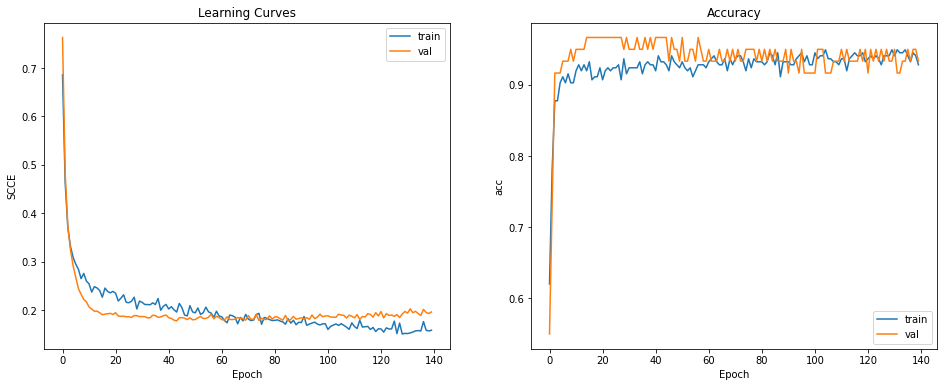

In [9]:
# plot learning curves
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('SCCE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.legend()

plt.show()

In [10]:
# Accuracy score
print('Accuracy:', history.history['val_acc'][-1])

Accuracy: 0.9333333373069763


In [11]:
# Accuracy on test v.2
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1) # class probability to class 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.933


In [12]:
# Accuracy on test v.3
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.1960 - acc: 0.9333
Test score: 0.19600076973438263
Test accuracy: 0.9333333373069763
